In [134]:
import numpy as np
from typing import Tuple
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import seaborn as sns

from GYAK05 import KNNClassifier as knn

In [135]:
csv_path = "iris.csv"

In [136]:
def load_csv(csv_path:str) ->Tuple[np.ndarray,np.ndarray]:
    np.random.seed(42)
    dataset = np.genfromtxt(csv_path,delimiter=',')
    np.random.shuffle(dataset,)
    x,y = dataset[:,:4],dataset[:,-1]
    return x,y

In [137]:
x,y = load_csv(csv_path)
x,y

(array([[ 6.100e+00,  2.800e+00,  4.700e+00,  1.200e+00],
        [ 5.700e+00,  3.800e+00,  1.700e+00,  3.000e-01],
        [ 7.700e+00,  2.600e+00,  6.900e+00,  2.300e+00],
        [ 6.000e+00,  2.900e+00,  4.500e+00,  1.500e+00],
        [ 6.800e+00,  2.800e+00, -1.111e+03,  1.400e+00],
        [ 5.400e+00,  3.400e+00,  1.500e+00,  4.000e-01],
        [ 5.600e+00,  2.900e+00,  3.600e+00,  1.300e+00],
        [ 6.900e+00,  3.100e+00,  5.100e+00,  2.300e+00],
        [ 6.200e+00,  2.200e+00,  4.500e+00,  1.500e+00],
        [ 5.800e+00,  2.700e+00,  3.900e+00,  1.200e+00],
        [ 6.500e+00,  3.200e+00,  5.100e+00,  2.000e+00],
        [ 4.800e+00,  3.000e+00,  1.400e+00,  1.000e-01],
        [ 5.500e+00,  3.500e+00,        nan,  2.000e-01],
        [ 4.900e+00,  3.100e+00,  1.500e+00,  1.000e-01],
        [ 5.100e+00,  1.000e+02,  1.500e+00,  3.000e-01],
        [ 6.300e+00,  3.300e+00,  4.700e+00,  1.600e+00],
        [ 6.500e+00,  3.000e+00,  5.800e+00,  2.200e+00],
        [ 5.60

In [138]:
np.mean(x, axis=0), np.var(x, axis=0)

(array([nan, nan, nan, nan]), array([nan, nan, nan, nan]))

In [139]:
np.nanmean(x, axis=0), np.nanvar(x, axis = 0)

(array([ 355.46503497, -280.09189189,    2.95      ,   21.74726027]),
 array([1.73561968e+07, 1.18405444e+07, 1.51049922e+04, 6.11729208e+04]))

In [140]:
x[np.isnan(x)] = 3.5

In [141]:
y = np.delete(y,np.where(x < 0.0)[0],axis=0)
y = np.delete(y,np.where(x > 13.0)[0],axis=0)
x = np.delete(x,np.where(x < 0.0)[0],axis=0)
x = np.delete(x,np.where(x > 13.0)[0],axis=0)
x.shape,y.shape

((144, 4), (144,))

In [142]:
def train_test_split(features: np.ndarray, labels: np.ndarray, test_split_ratio: float) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    test_size = int(len(features) * test_split_ratio)
    train_size = len(features) - test_size
    assert len(features) == test_size + train_size, "Size mismatch!"

    x_train,y_train = features[:train_size,:],labels[:train_size]
    x_test,y_test = features[train_size:train_size+test_size,:], labels[train_size:train_size + test_size]
    return (x_train,y_train,x_test,y_test)


In [143]:
x_train, y_train, x_test, y_test = train_test_split(x, y, 0.2)

In [144]:
def euclidean(points:np.ndarray,element_of_x:np.ndarray) -> np.ndarray:
    return np.sqrt(np.sum((points - element_of_x)**2,axis=1))


def predict(x_train:np.ndarray,y_train:np.ndarray,x_test:np.ndarray,k:int) -> np.ndarray:
    labels_pred = []
    for x_test_element in x_test:
        distances = euclidean(x_train,x_test_element)
        distances = np.array(sorted(zip(distances,y_train)))
        label_pred = mode(distances[:k,1],keepdims=False).mode
        labels_pred.append(label_pred)
    return np.array(labels_pred,dtype=np.int32)


In [145]:
y_preds = predict(x_train, y_train, x_test, 3)
y_preds

array([0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2, 2, 1, 2, 1, 1, 2,
       0, 1, 1, 0, 1, 2])

In [146]:
def accuracy(y_test:np.ndarray,y_preds:np.ndarray) -> float:
    true_positive = (y_test == y_preds).sum()
    return true_positive / len(y_test) * 100

In [147]:
def plot_confusion_matrix(y_test:np.ndarray,y_preds:np.ndarray):
        conf_matrix = confusion_matrix(y_test,y_preds)
        sns.heatmap(conf_matrix,annot=True)

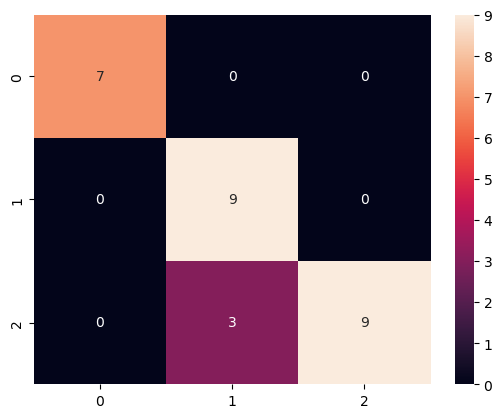

In [148]:
plot_confusion_matrix(y_test, y_preds)

In [149]:
classifier = knn(3, 0.2)

TypeError: KNNClassifier() takes no arguments